In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
p_lnr=LinearRegression()

In [50]:
data=pd.read_csv(r"C:\Users\ravit\OneDrive\Desktop\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression\Position_Salaries.csv")

In [4]:
X=data.iloc[: ,1:2]
y=data.iloc[: ,2]

In [59]:
from sklearn.preprocessing import PolynomialFeatures
reg_poly=PolynomialFeatures(degree=12)

In [60]:
X_poly=reg_poly.fit_transform(X)

In [61]:
reg_poly.fit(X_poly,y)
p_lnr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
p_pred=p_lnr.predict(reg_poly.fit_transform(np.array([[6]])))

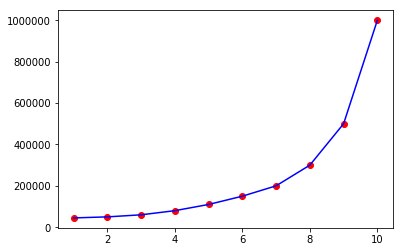

In [63]:
plt.scatter(X,y,color="red")
plt.plot(X,p_lnr.predict(reg_poly.fit_transform(X)),color="blue")
plt.show()

In [68]:
p_pred

array([150000.00003958])

# Support vector regression

In [195]:
data=pd.read_csv(r"C:\Users\ravit\OneDrive\Desktop\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression\Position_Salaries.csv")

In [196]:
X=data.iloc[: ,1:2].values
y=data.iloc[: , 2].values

In [194]:
y=y(dtype=float)

TypeError: 'numpy.ndarray' object is not callable

In [197]:
y=np.array([[y]])

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sca_x=StandardScaler()
sca_y=StandardScaler()
X_sca=sca_x.fit_transform(X)
y_sca=sca_y.fit_transform(y)

# Decision Tree

In [210]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=42)

In [211]:
X=data.iloc[: ,1:2].values
y=data.iloc[: , 2].values

In [212]:
dt_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [218]:
dt_reg.predict(np.array([[8.5]]))

array([300000.])

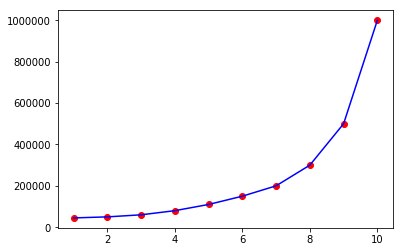

In [219]:
plt.scatter(X,y,color='red')
plt.plot(X,dt_reg.predict(X),color='blue')
plt.show()

In [9]:
pd.value_counts(data['Level'])

10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: Level, dtype: int64

In [52]:
w=pd.crosstab(data['Salary'],data['Level'])

In [54]:
w["flag"]=np.round((w[1]/sum(w[1]))*100,2)

In [59]:
for i in data.index:
    if data.loc[i]['Level']==1:
        data.loc[i,'Groups']='level1'
        continue
    if data.loc[i]['Level']==2:
        data.loc[i,'Groups']='level2'
        continue
    if data.loc[i]['Level']==3:
        data.loc[i,'Groups']='level3'
        continue
    if data.loc[i]['Level']==4:
        data.loc[i,'Groups']='level4'
        continue
    if data.loc[i]['Level']==5:
        data.loc[i,'Groups']='level5'
        continue
    if data.loc[i]['Level']==6:
        data.loc[i,'Groups']='level6'
        continue
    if data.loc[i]['Level']==7:
        data.loc[i,'Groups']='level7'
        continue
    if data.loc[i]['Level']==8:
        data.loc[i,'Groups']='level8'
        continue
    if data.loc[i]['Level']==9:
        data.loc[i,'Groups']='level9'
        continue
    if data.loc[i]['Level']==10:
        data.loc[i,'Groups']='level10'
        continue    
    else:
        data.loc[i,'Groups']='NAN'

In [23]:
n=(data[data['Level']==5]).index

In [40]:
data['Group']=[0,0,0,0,0,0,0,0,0,0]

In [53]:
del data['Group']

In [60]:
data

,Position,Level,Salary,Groups
0,Business Analyst,1,45000,level1
1,Junior Consultant,2,50000,level2
2,Senior Consultant,3,60000,level3
3,Manager,4,80000,level4
4,Country Manager,5,110000,level5
5,Region Manager,6,150000,level6
6,Partner,7,200000,level7
7,Senior Partner,8,300000,level8
8,C-level,9,500000,level9
9,CEO,10,1000000,level10


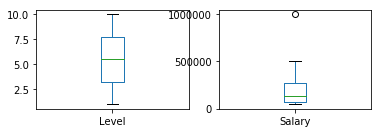

In [70]:
data.plot(kind='box', subplots=True ,layout=(2,2), sharex=False ,sharey=False)
plt.show()

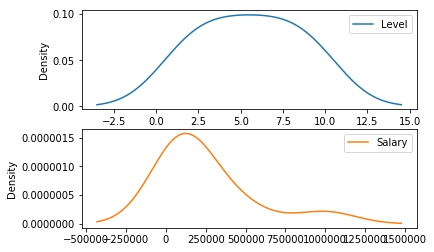

In [73]:
data.plot(kind='density', subplots=True , sharex=False ,sharey=False)
plt.show()

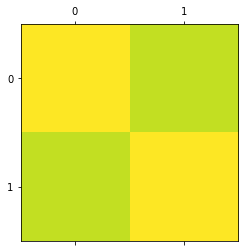

In [81]:
correlation=data.corr()
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation, vmin=-1,vmax=1)

In [83]:
print(data.corr())

           Level    Salary
Level   1.000000  0.817949
Salary  0.817949  1.000000


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bill=pd.read_csv(r"C:\Users\ravit\OneDrive\Desktop\Machine Learning A-Z Template Folder\unbill_data.csv")

In [2]:
print(np.max(bill['Consumption']))
print(np.min(bill['Consumption']))

36309949.0
0.0


In [19]:
for i in bill.index:
    if bill.loc[i]['Consumption']<=10000:
        bill.loc[i,'Groups']='low'
        continue
    if bill.loc[i]['Consumption']<=10000000 and bill.loc[i]['Consumption']>10000:
        bill.loc[i,'Groups']='mid'
        continue
    if bill.loc[i]['Consumption']>10000000:
        bill.loc[i,'Groups']='high'
    
    
#pd.value_counts(bill['Consumption'])

In [20]:
pd.value_counts(bill['Groups'])
#bill.head()

low     23794
mid     11579
high        2
Name: Groups, dtype: int64

In [22]:
x=(pd.value_counts(bill['RootCause'])/len(bill))*100

In [26]:
x

No Root Cause Match    49.789399
Implausible            18.009894
Impl Perm Est          16.452297
Outsort                 6.151237
EMMA                    5.201413
Business Exception      3.409187
Lock -  Billing         0.599293
Lost Site               0.302473
Technical Exception     0.053710
Billing Block           0.031095
Name: RootCause, dtype: float64

In [44]:
x.index[0]

'No Root Cause Match'

In [45]:
def 
for i in bill.index:
    for n in range(0,9):
        if bill.loc[i]['RootCause']==x.index[n]:
            bill.loc[i,'Root_groups']='group'+str(n+1)
            continue


In [62]:
bill.head(1)

,Segment,Billing_Class,Site_Billing_Status,Site_Status,Consumption,Value_Unbilled,Billing_Frequency,UnbilledDays,RootCause,Voice_Attempt,target
0,Others,Small and Medium Enterprises,Live - Billed & Stop,Clean,1285.0,134.7,Q,144.0,No Root Cause Match,NaN,0


In [60]:
def group_by(var1, var2,var3):
    x=pd.crosstab(var3[var1],var3[var2])
    x["flag"]=np.round((x[1]/sum(x[1]))*100,2)
    def abc(flag):
        if flag < 10:
            return "group1"
        elif flag< 40:
            return "group2"
        elif flag< 60:
            return "group3"
        else:
            return "group4"
    x["var1_groups"]=x["flag"].apply(abc)
    var3=pd.merge(var3,x,on=var1,how="left")
    var3=var3.drop([0,1,"flag"],axis=1)
    return var3

In [65]:
bi=group_by('RootCause','target',bill)

In [74]:
bill1=bill

In [75]:
bill1['Segment']=np.where(bill1['Segment']=='Medium Enterpris','Medium Enterprise',bill1['Segment'])

In [81]:
np.round(pd.value_counts(bill1['Segment'])/len(bill1)*100,2)

Others               89.94
Small Enterprise      8.56
Medium Enterprise     1.16
Segment TBA           0.34
Name: Segment, dtype: float64

In [85]:
bill1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Consumption,35375.0,24994.080701,226778.720815,0.0,0.0,3561.00,15339.00,36309949.00
Value_Unbilled,35375.0,1176.268066,3291.090621,0.0,107.3,315.22,862.43,162985.28
UnbilledDays,35075.0,322.145716,391.246611,1.0,137.0,157.00,256.00,2335.00
target,35375.0,0.048000,0.213769,0.0,0.0,0.00,0.00,1.00


In [90]:
pd.crosstab(bill1['Segment'],bill1['RootCause'])

RootCause,Billing Block,Business Exception,EMMA,Impl Perm Est,Implausible,Lock - Billing,Lost Site,No Root Cause Match,Outsort,Technical Exception
Segment,,,,,,,,,,
Medium Enterprise,0,29,65,74,97,5,0,105,32,2
Others,10,1047,1487,5048,5421,172,96,16575,1962,0
Segment TBA,0,8,32,4,1,5,0,63,4,3
Small Enterprise,1,122,256,694,852,30,11,870,178,14


In [97]:
(bill.groupby('Segment')['Consumption'].sum()).transpose()

Segment
Medium Enterprise    4.160642e+07
Others               6.116483e+08
Segment TBA          8.545098e+06
Small Enterprise     2.223658e+08
Name: Consumption, dtype: float64